In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import pandas as pd
corpus_root = 'drive/MyDrive/Colab Notebooks/datasets/bi/bidataset/' 

Mounted at /content/drive


In [ ]:
# read 
df_train = pd.read_csv(corpus_root +'bi_stroke_train.csv')
df_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df_train.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
df_test = pd.read_csv(corpus_root +'bi_stroke_test.csv')
df_test

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,66638,Female,68,1,0,No,Self-employed,Urban,79.79,29.7,never smoked,1
1,70042,Male,58,0,0,Yes,Private,Urban,71.20,NaN,Unknown,1
2,32399,Male,54,0,0,Yes,Private,Rural,96.97,29.1,smokes,1
3,3253,Male,61,0,1,Yes,Private,Rural,111.81,27.3,smokes,1
4,71796,Female,70,0,1,Yes,Private,Rural,59.35,32.3,formerly smoked,1
5,14499,Male,47,0,0,Yes,Private,Urban,86.94,41.1,formerly smoked,1
6,49130,Male,74,0,0,Yes,Private,Urban,98.55,25.6,Unknown,1
7,28291,Female,79,0,1,Yes,Private,Urban,226.98,29.8,never smoked,1
8,51169,Male,81,0,0,Yes,Private,Urban,72.81,26.3,never smoked,1
9,66315,Female,57,0,0,No,Self-employed,Urban,68.02,37.5,never smoked,1


In [ ]:
df_train["hypertension"].dtype

dtype('int64')

In [ ]:
df_train["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
df_train["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
df_train["hypertension"].unique()

array([0, 1])

In [ ]:
# df_train["ever_married"].unique()

In [ ]:
# df_train["Residence_type"].unique()

In [ ]:
df_train["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
df_train["stroke"].unique()

array([1, 0])

In [ ]:
df_train["bmi"]=df_train["bmi"].replace('NaN', '')
df_train["bmi"].isnull().sum()

199

Class fake: 219
Class real: 4823
<class 'pandas.core.series.Series'>


<BarContainer object of 2 artists>

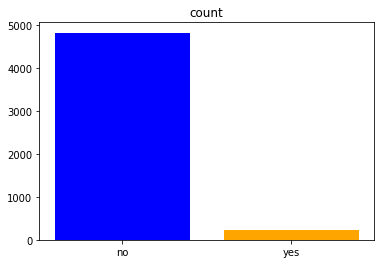

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

target_count = df_train.stroke.value_counts()
print('Class fake:', target_count[1])
print('Class real:', target_count[0])
# print('Proportion:', round(target_count["0"] / target_count["1"], 2), ': 1')
bars = ('no', 'yes')
print(type(target_count))
plt.title("count")
plt.bar(bars,target_count,color=[ 'blue',  'orange'])

In [ ]:
# 計算、資料處理
import numpy as np
import pandas as pd
from collections import Counter

#訓練資料
from sklearn.model_selection import train_test_split,GridSearchCV

#Metrics
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

# 視覺化
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']  
mpl.rcParams['axes.unicode_minus'] = False

#文字
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

#設定最大能顯示1000rows
pd.set_option("display.max_rows", 1000)    
pd.set_option("display.max_columns", 1000)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# 老師的
coded_ever_married = {'Yes':1, 'No':0}
coded_work_type = {'Private':1, 'Self-employed':2, 'Govt_job':3, 'children':4,'Never_worked':4}
coded_gender = {'Male':1, 'Female':2,'Other':3}
coded_smoking_status ={'formerly smoked':1, 'never smoked':2,'smokes':3, 'Unknown':4}
coded_Residence_type={'Urban':1, 'Rural':2}
# girlWord = ['beautiful', 'girl']
# boyWord = ['man','handsome']

#身高體重 BMI
def BMI(x,y):
    y = y/100
    y += 0.00000000001
    return x/(y*y)

#文字分詞
def token(text):
    array = []
    for i in text:
        nltk_tokens = nltk.word_tokenize(i)
        i = nltk_tokens
        array.append(i)
    return array

#數詞的數量
def token_count(text):
    b = []
    for i in text:
        count = len(i)
        b.append(count)
    return b

In [ ]:
# df_train["gender"]

In [ ]:
# df_train = df_train.replace({"gender": coded_gender})

In [ ]:
# df_train = df_train.replace({"ever_married": ever_married})

In [ ]:
# df_train['ever_married']

In [ ]:
# df_train['ever_married'] = df_train['ever_married'].astype(np.int64)

In [ ]:
df_train = df_train.replace({"gender": coded_gender})

In [ ]:
df_train = df_train.replace({"ever_married": coded_ever_married})

In [ ]:
# df_train = df_train.replace({"work_type": coded_work_type})work_typeResidence_type

In [ ]:
#  df_train = df_train.replace({"Residence_type": coded_Residence_type})

In [ ]:
df_train = df_train.replace({"smoking_status": coded_smoking_status})

In [ ]:
df_train['bmi'] = df_train['bmi'].fillna(df_train['bmi'].mean())

In [ ]:
df_train

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,Urban,228.69,36.600000,1,1
1,51676,2,61.0,0,0,1,Self-employed,Rural,202.21,28.871629,2,1
2,31112,1,80.0,0,1,1,Private,Rural,105.92,32.500000,2,1
3,60182,2,49.0,0,0,1,Private,Urban,171.23,34.400000,3,1
4,1665,2,79.0,1,0,1,Self-employed,Rural,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5037,18234,2,80.0,1,0,1,Private,Urban,83.75,28.871629,2,0
5038,44873,2,81.0,0,0,1,Self-employed,Urban,125.20,40.000000,2,0
5039,19723,2,35.0,0,0,1,Self-employed,Rural,82.99,30.600000,2,0
5040,37544,1,51.0,0,0,1,Private,Rural,166.29,25.600000,1,0


In [ ]:
df_test = df_test.replace({"gender": coded_gender})
df_test = df_test.replace({"ever_married": coded_ever_married})

In [ ]:
df_test = df_test.replace({"work_type":coded_work_type})

In [ ]:
df_test = df_test.replace({"Residence_type": coded_Residence_type})

In [ ]:
df_test = df_test.replace({"smoking_status": coded_smoking_status})

In [ ]:
df_test['bmi'] = df_test['bmi'].fillna(df_test['bmi'].mean())

In [ ]:
#切驗證集
X = df_train.drop('stroke',axis=1)
y = df_train['stroke']
test = df_test.drop('stroke',axis=1)

In [ ]:
from sklearn.utils import shuffle
X,y = shuffle(X,y, random_state=1337) 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
a

NameError: ignored

In [ ]:

# print('Class 0沒中風 1:中風:', np.bincount(y_smote))
# # print('Class real:', (y_smote==0).sum)
# print("性別: 0:沒中風 1:中風")
# sns.countplot(y_smote)


In [ ]:
X_train.shape

In [ ]:
y_train.shape

<font face = TimeRomans size=3 color =blue>隨機森林</font>

In [ ]:
# 使用 random forest   #ref: https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC5-2%E8%AC%9B-kaggle%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E7%AB%B6%E8%B3%BD%E7%A5%9E%E5%99%A8xgboost%E4%BB%8B%E7%B4%B9-1c8f55cffcc
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_score = rfc.predict(X_test)
rfc.score(X_test, y_test)

In [ ]:
rfc_ans = rfc.predict(test)
rfc_ans 

In [ ]:
pred = rfc.predict(X_test)
true = y_test
# print("pred : ",pred)
# print("true : ",y_test)

# print("-"*30)

# for ind,value in enumerate(pred):
#     if(value != y_test[ind]):
#         print(X_test[ind]," true label:",y_test[ind]," pred : ",value)

In [ ]:
#Accuracy = TP+TN/TP+FP+FN+TN
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(true,pred).ravel()
(tn, fp, fn, tp)
accuracy= (tp+tn)/ (tp+fp+fn+tn)
recall= tp/(tp+fn)
precision=tp/(tp+fp)
f1_score=2*(precision*recall)/(precision+recall)
print(accuracy)
print(recall)
print(precision)
print(f1_score)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

# # 讀取資料
# import pandas as pd
# df=pd.read_csv('./data.csv')

# 在各種『決策門檻』（decision threshold）下，計算 『真陽率』（True Positive Rate；TPR）與『假陽率』（False Positive Rate；FPR）
fpr, tpr, threshold = roc_curve(true,pred)
print("fpr:",fpr)
print("tpr:",tpr)
print("threshold:",threshold)

auc1 = auc(fpr, tpr)
## Plot the result
plt.title('RandomForest Receiver Operating Characteristic')
plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print("auc:",auc1 )
plt.show()    

<font face = TimeRomans size=3 color =blue>Xgboost</font>

In [ ]:
# ref: https://zhuanlan.zhihu.com/p/117464631

#imported libsimport numpy as np
import pandas as pd
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import sys

# X_train = train.drop('gender',axis=1)
# y_train = train['gender']
# # test = test.drop('gender',axis=1)
# train_X, test_X, train_y, test_y = train_test_split(X_train, y_train, test_size = 0.3, random_state=42)

# xgb_pipeline = Pipeline([('scaler', StandardScaler()), ('classifier',XGBClassifier())])
# gbm_param_grid = {
#     'classifier__max_depth': np.array([5,6,7,8,9,10,11,12]),
#     'classifier__learning_rate': np.array([0.01,0.001]),
#     'classifier__n_estimators': np.array([100,200,300,400]),
#     'classifier__subsample': np.array([1,1.2,1.4]),
#     'classifier__lambda': np.array([1]),
#     'classifier__gamma': np.array([0])
#     #'classifier__colsample_bytree': np.arange(0,1.1,.2)
# }

# grid_search = GridSearchCV(estimator=xgb_pipeline, param_grid=gbm_param_grid, n_jobs= -1,
#                          scoring='f1_weighted', verbose=10)

# grid_search.fit(train_X,train_y)
# print(grid_search.best_params_)
# print(grid_search.score(test_X,test_y))

In [ ]:
# !pip3 install xgboost
# from xgboost import XGBClassifier
# xgbc = XGBClassifier(
#     # gamma = 0, 
#     # lreg_lambda=1, 
#     # learning_rate=0.01, 
#     # max_depth=5, 
#     # n_estimators=100, 
#     # subsample=1
#     )

# xgbc.fit(X_train, y_train)
# xgbc.score(X_test, y_test)

In [ ]:
!pip3 install xgboost
from xgboost import XGBClassifier
xgbc = XGBClassifier()

xgbc.fit(X_train, y_train)
xgbc.score(X_test, y_test)

In [ ]:
y_score = xgbc.predict(X_test)

In [ ]:
test_xgbc =test
xgbc_ans = xgbc.predict(test_xgbc)
xgbc_ans 

In [ ]:
pred = xgbc.predict(X_test)
true = y_test

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(true,pred).ravel()
(tn, fp, fn, tp)
accuracy= (tp+tn)/ (tp+fp+fn+tn)
recall= tp/(tp+fn)
precision=tp/(tp+fp)
f1_score=2*(precision*recall)/(precision+recall)
print(accuracy)
print(recall)
print(precision)
print(f1_score)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

# # 讀取資料
# import pandas as pd
# df=pd.read_csv('./data.csv')

# 在各種『決策門檻』（decision threshold）下，計算 『真陽率』（True Positive Rate；TPR）與『假陽率』（False Positive Rate；FPR）
fpr, tpr, threshold = roc_curve(true,pred)
print("fpr:",fpr)
print("tpr:",tpr)
print("threshold:",threshold)

auc1 = auc(fpr, tpr)
## Plot the result
plt.title('XGBOOST Operating Characteristic')
plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print("auc:",auc1 )
plt.show()    

<font face = TimeRomans size=3 color =blue>SVM</font>

In [ ]:
# 使用 SVM 分類器
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0)
clf.fit(X_train,y_train)

ValueError: ignored

In [ ]:
predicted_test = clf.predict(test)
predicted_test

NotFittedError: ignored

In [ ]:
pred = clf.predict(X_test)
true = y_test

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(true,pred).ravel()
(tn, fp, fn, tp)
accuracy= (tp+tn)/ (tp+fp+fn+tn)
recall= tp/(tp+fn)
precision=tp/(tp+fp)
f1_score=2*(precision*recall)/(precision+recall)
print(accuracy)
print(recall)
print(precision)
print(f1_score)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

# # 讀取資料
# import pandas as pd
# df=pd.read_csv('./data.csv')

# 在各種『決策門檻』（decision threshold）下，計算 『真陽率』（True Positive Rate；TPR）與『假陽率』（False Positive Rate；FPR）
fpr, tpr, threshold = roc_curve(true,pred)
print("fpr:",fpr)
print("tpr:",tpr)
print("threshold:",threshold)

auc1 = auc(fpr, tpr)
## Plot the result
plt.title('SVM Receiver Operating Characteristic')
plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print("auc:",auc1 )
plt.show()    

<font face = TimeRomans size=3 color =blue>DecisionTree</font>

In [ ]:
# DecisionTree
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree_train = dtree.fit(X_train,y_train)
y_score = dtree_train.predict(X_test)


In [ ]:
pred = dtree_train.predict(X_test)
true = y_test

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(true,pred).ravel()
(tn, fp, fn, tp)
accuracy= (tp+tn)/ (tp+fp+fn+tn)
recall= tp/(tp+fn)
precision=tp/(tp+fp)
f1_score=2*(precision*recall)/(precision+recall)
print(accuracy)
print(recall)
print(precision)
print(f1_score)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

# # 讀取資料
# import pandas as pd
# df=pd.read_csv('./data.csv')

# 在各種『決策門檻』（decision threshold）下，計算 『真陽率』（True Positive Rate；TPR）與『假陽率』（False Positive Rate；FPR）
fpr, tpr, threshold = roc_curve(true,pred)
print("fpr:",fpr)
print("tpr:",tpr)
print("threshold:",threshold)

auc1 = auc(fpr, tpr)
## Plot the result
plt.title('DecisionTree Receiver Operating Characteristic')
plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print("auc:",auc1 )
plt.show()    